# __Prodigy Data Science Internship__
### Task 1: Perform Data Cleaning & EDA on any DataSet.
"I have been Data Cleaning and EDA a lot using Pandas, untill I come across __Klib__. This amazing python lbrary make you do importing, cleaning, analyzing and preprocessing of a data in ___no time___.  "

In [ ]:
# Installing Klib on my machine
# !pip install klib  #already installed on my laptop

In [3]:
# Importing the libraries
import pandas as pd
import klib

## Importing Pakistan Largest Ecommerce Dataset

In [4]:
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_11084\2481702470.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


In [6]:
# gives error as many columns has mixed data types.
#Solution 1: Specify data type for each column manually
#Solution 2: set Low_memory = False. This ensure pandas read entire file in one Go, instead of chunks.

# I use the second method, even though it will take more memory and processing resource. But will save me time doing manual labelling

df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv",low_memory=False)

## First things First,Exploratory Data Analysis (EDA) using __klib__

In [7]:
#printing the first 5 columns
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


## Now, I will let the __klib__ take our from __Pandas__ 
### Simple Functions for visualizing the dataset 

GridSpec(6, 13)

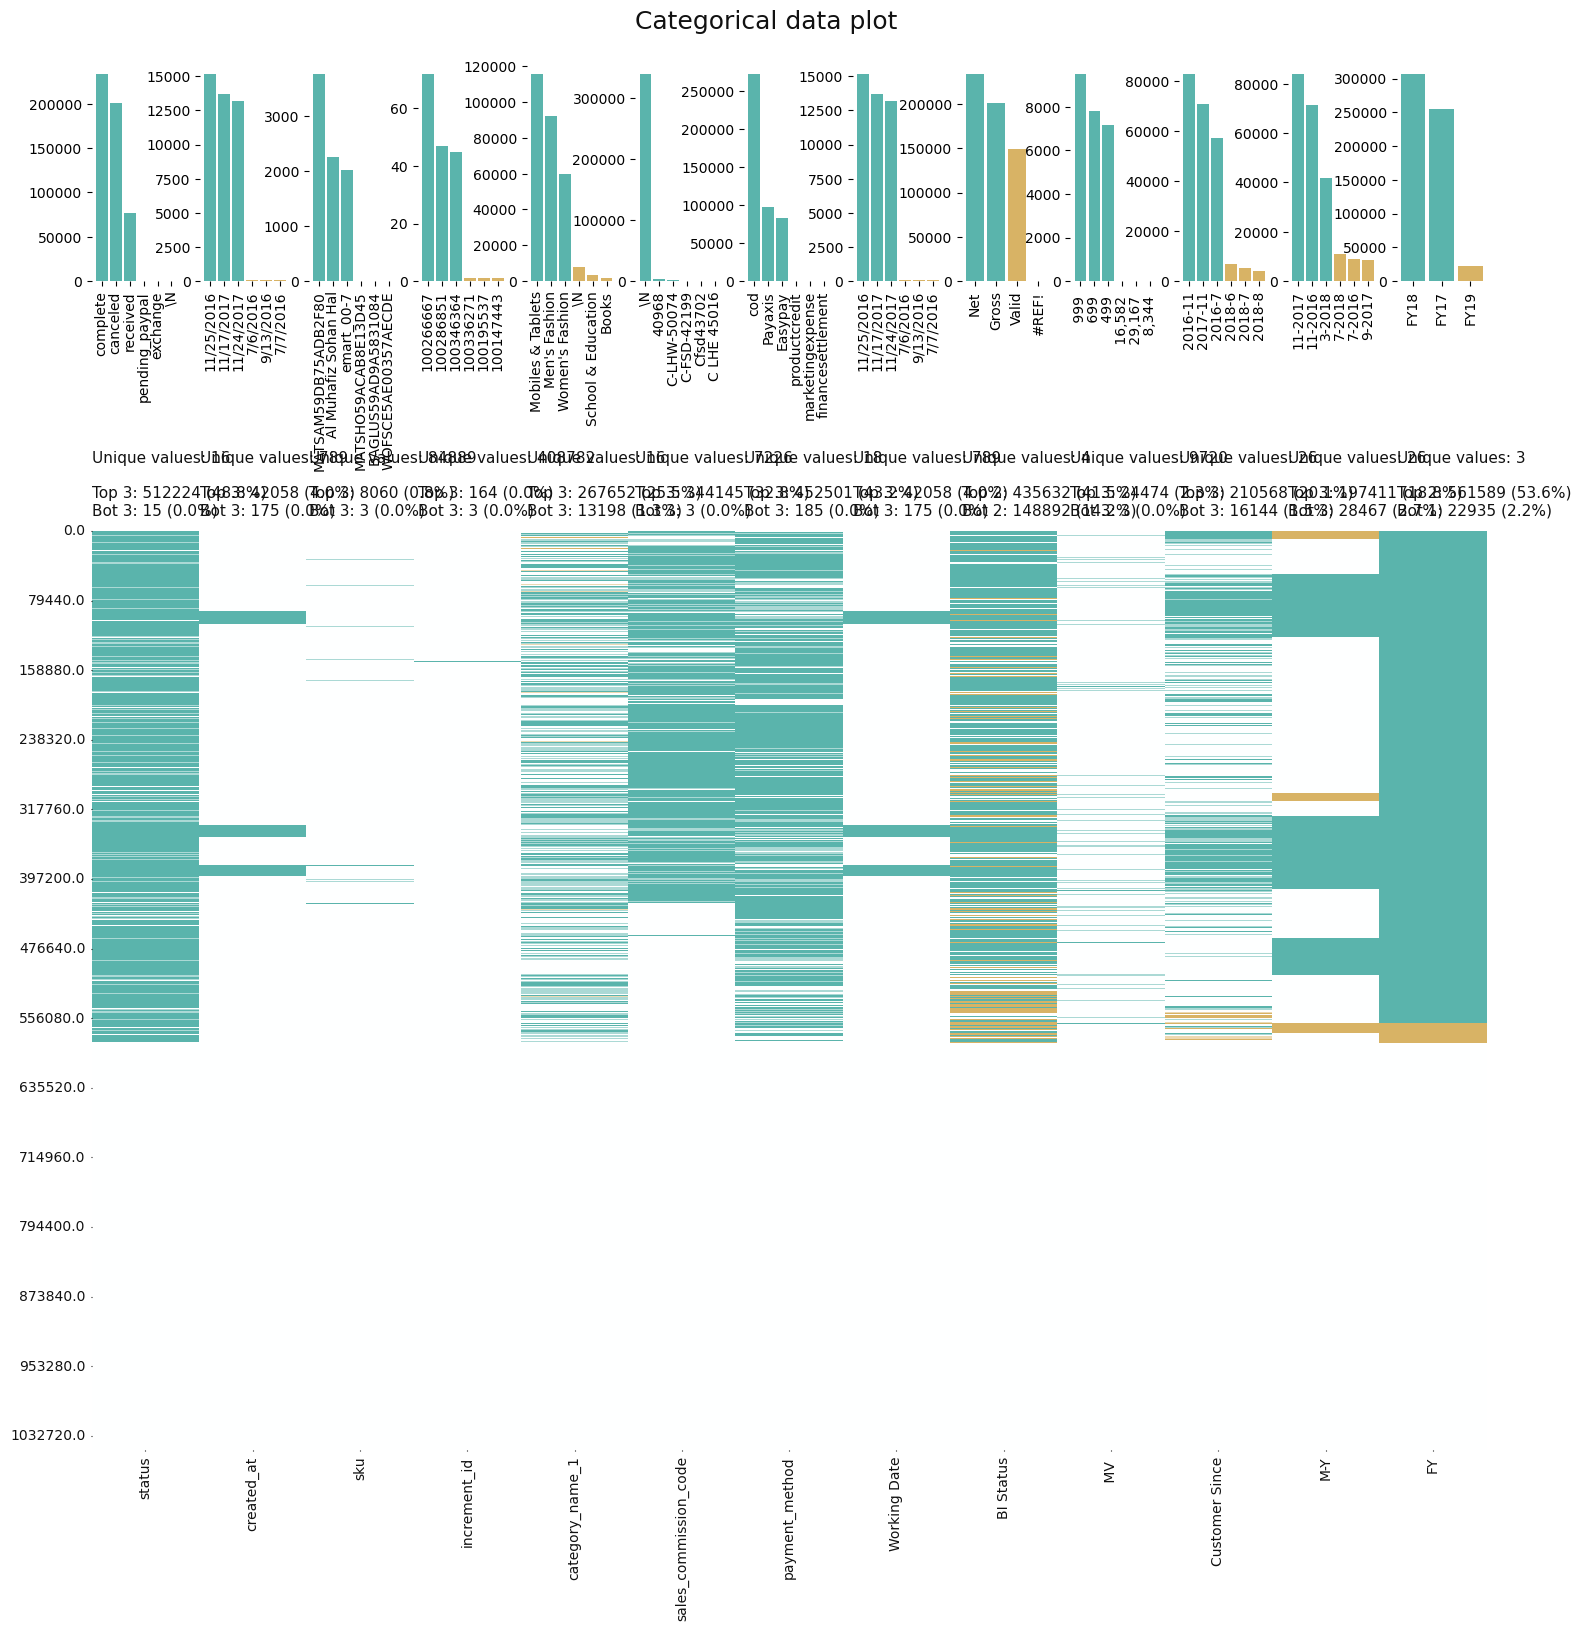

In [11]:
# number and frequency of categorical feature
klib.cat_plot(df)

## By now,I understand we have a lot of data (26 columns & half a million records). Which is __unneccessary__  for this task. 
## So, the solution is to just drop some unwanted columns to improve the processing speed.
### First identify these columns using _df.info()_ method

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

## I decide to remove all data of columns from __13(BI Status) to 25(Unnamed: 25)__.
## Because I just don't need them

In [15]:
# Drop columns from index 13 to 25
df.drop(df.columns[13:26], axis=1, inplace=True)


In [17]:
# Now, checking the info of the datarame again
df.info()
# We can see dataframe size reduces to 104 MB from 208 MB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
dtypes: float64(5), object(8)
memory usage: 104.0+ MB


GridSpec(6, 8)

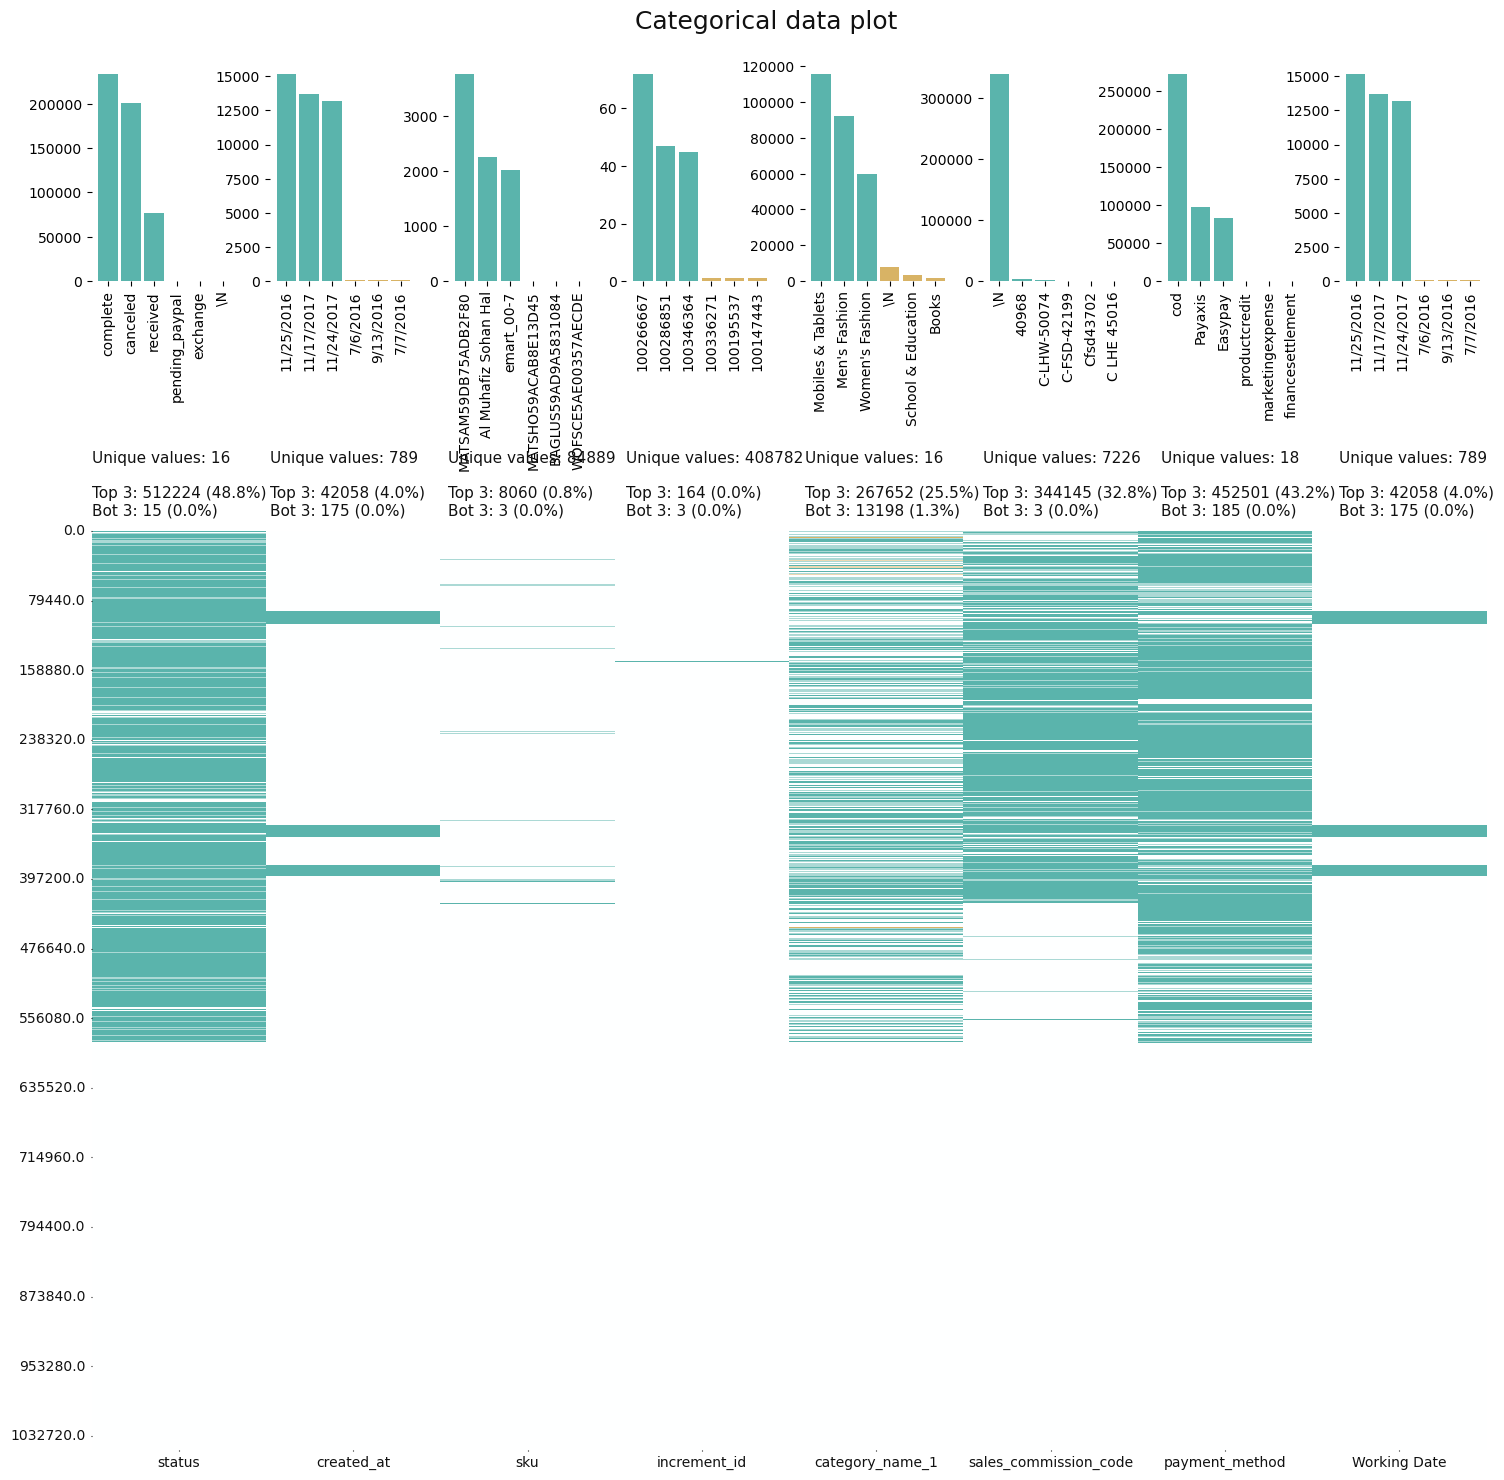

In [19]:
# Now, Lets get back to klib 
# and visualize the number of categorical features
klib.cat_plot(df)

## Insights taken from the above __categorical plot__
1. About 220K orders has been completed, followed by 190K cancelled.
2. The top 3 customers are MATSAM...B2F80 (about 3900 orders), Al Muhafiz Sohan Halw (2100 orders), and emart_007 (2000 orders)
3. The best payment method is cod, followed by payaxis and easypaisa.

In [20]:
## Now, check fro any correlation
klib.corr_mat(df)

,item_id,price,qty_ordered,grand_total,discount_amount
item_id,1.00,0.14,0.03,0.05,0.14
price,0.14,1.00,-0.02,0.28,0.46
qty_ordered,0.03,-0.02,1.00,0.75,-0.01
grand_total,0.05,0.28,0.75,1.00,0.10
discount_amount,0.14,0.46,-0.01,0.10,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

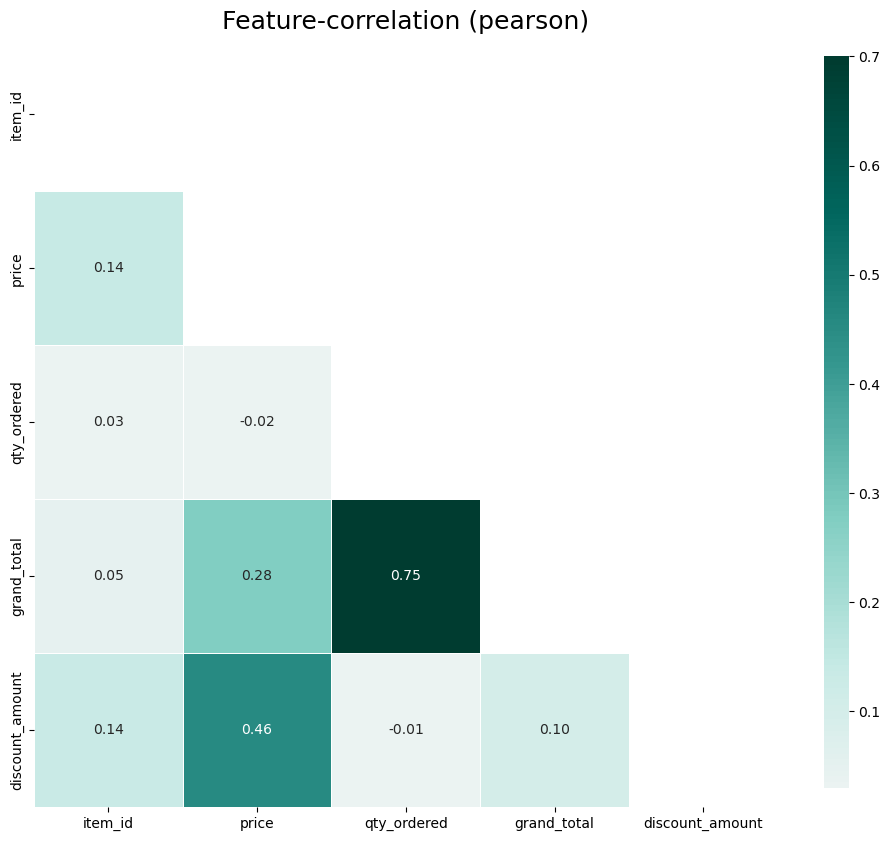

In [21]:
## Making correlation plot usin klib, eazy peezi
klib.corr_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='item_id', ylabel='Density'>

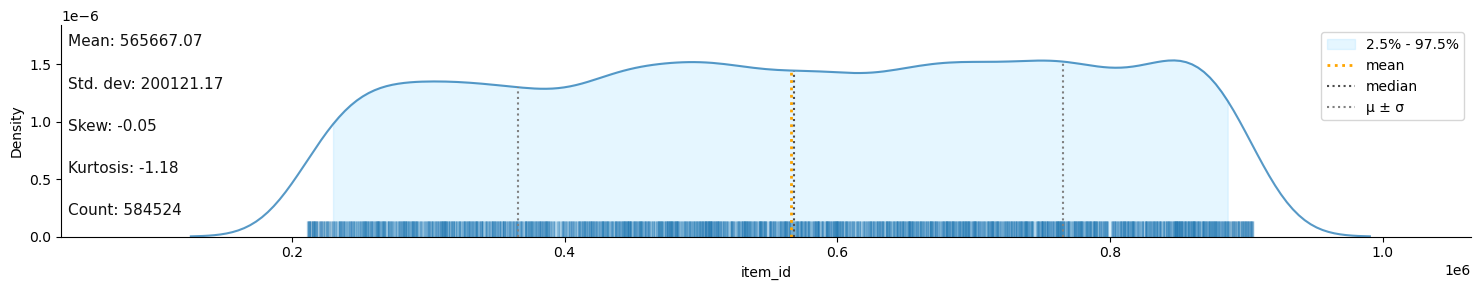

In [22]:
## Create a probablity density function for every every feature.
klib.dist_plot(df)

## Second Part is Cleaning the dataset using __klib__

In [29]:
#first get a concise summary of dataframe. Yes, I am doing this again. So you can understand the power of klib.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
dtypes: float64(5), object(8)
memory usage: 104.0+ MB


### 1. Performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

In [32]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (584524, 13) - Remaining NAs: 137374


Dropped rows: 464051
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 6032663
Reduced memory by at least: 71.84 MB (-69.08%)



In [33]:
# See how the klib did amazing data cleaning, adjust the data types, drop empty rows. and reduced memory by 71.84 MB (-69%)
#AGAIN doing the df_cleaned.info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   item_id                584524 non-null  float32 
 1   status                 584509 non-null  category
 2   created_at             584524 non-null  category
 3   sku                    584504 non-null  string  
 4   price                  584524 non-null  float64 
 5   qty_ordered            584524 non-null  float32 
 6   grand_total            584524 non-null  float64 
 7   increment_id           584524 non-null  string  
 8   category_name_1        584360 non-null  category
 9   sales_commission_code  447349 non-null  category
 10  discount_amount        584524 non-null  float64 
 11  payment_method         584524 non-null  category
 12  working_date           584524 non-null  category
dtypes: category(6), float32(2), float64(3), string(2)
memory usage: 32.2 MB


### You can compare this df_cleaned.head() to df.head() and see the __MAGIC__

### 2. Clean and Standarized the column names.


In [36]:
klib.clean_column_names(df_cleaned)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,working_date
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,8/28/2018
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018


# This is how EDA is done in __klib__ in just 4-5 lines of code, It is such a powerful a powerfull Python Library created by _Andreas Kanz_.